8982
2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
Epoch 1/20
16/16 [==============================] - 2s 68ms/step - loss: 2.6076 - accuracy: 0.5001 - val_loss: 1.8008 - val_accuracy: 0.6090
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 1.5124 - accuracy: 0.6812 - val_loss: 1.3768 - val_accuracy: 0.7030
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.1654 - accuracy: 0.7537 - val_loss: 1.2009 - val_accuracy: 0.7410
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.9570 - accuracy: 0.7948 - val_loss: 1.1016 - val_accuracy: 0.7600
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.7988 - accuracy: 0.8274 - val_loss: 1.0180 - val_accuracy: 0.7830
Epoch 6/20
16/16 [==============================] - 1s 61ms/step - loss: 0.6655 - accuracy: 0.8534 - val_loss: 0.9716 - val_accuracy: 0.8000

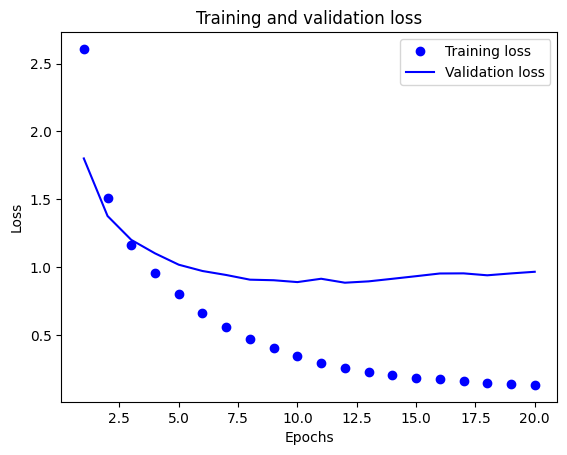

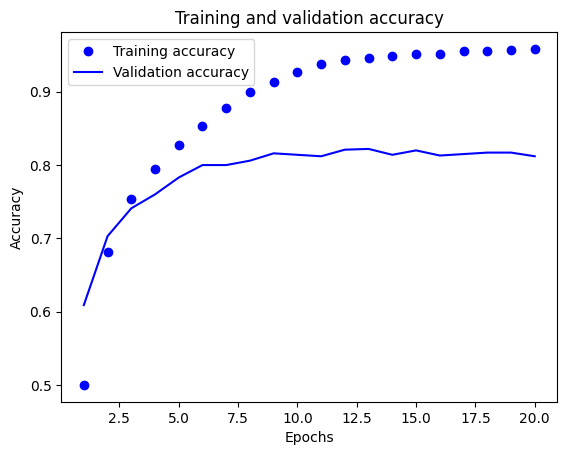

Epoch 1/9
18/18 [==============================] - 1s 67ms/step - loss: 0.2272 - accuracy: 0.9423
Epoch 2/9
18/18 [==============================] - 1s 65ms/step - loss: 0.1776 - accuracy: 0.9472
Epoch 3/9
18/18 [==============================] - 1s 48ms/step - loss: 0.1592 - accuracy: 0.9510
Epoch 4/9
18/18 [==============================] - 1s 41ms/step - loss: 0.1461 - accuracy: 0.9531
Epoch 5/9
18/18 [==============================] - 1s 41ms/step - loss: 0.1349 - accuracy: 0.9546
Epoch 6/9
18/18 [==============================] - 1s 43ms/step - loss: 0.1341 - accuracy: 0.9542
Epoch 7/9
18/18 [==============================] - 1s 41ms/step - loss: 0.1286 - accuracy: 0.9551
Epoch 8/9
18/18 [==============================] - 1s 41ms/step - loss: 0.1222 - accuracy: 0.9548
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 1.0881 - accuracy: 0.7930
[1.0880690813064575, 0.792965292930603]


In [5]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
 num_words=10000)

print(len(train_data))
print(len(test_data))
print(train_data[10])

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  for j in sequence:
   results[i, j] = 1.
 return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# def to_one_hot(labels, dimension=46):
#  results = np.zeros((len(labels), dimension))
#  for i, label in enumerate(labels):
#   results[i, label] = 1.
#  return results
# y_train = to_one_hot(train_labels)
# y_test = to_one_hot(test_labels)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])

# x_val = x_train[:1000]
# partial_x_train = x_train[1000:]
# y_val = y_train[:1000]
# partial_y_train = y_train[1000:]

# history = model.fit(partial_x_train,
# partial_y_train,
# epochs=20,
# batch_size=512,
# validation_data=(x_val, y_val))

# loss = history.history["loss"]
# val_loss = history.history["val_loss"]
# epochs = range(1, len(loss) + 1)
# plt.plot(epochs, loss, "bo", label="Training loss")
# plt.plot(epochs, val_loss, "b", label="Validation loss")
# plt.title("Training and validation loss")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()

# plt.clf()
# acc = history.history["accuracy"]
# val_acc = history.history["val_accuracy"]
# plt.plot(epochs, acc, "bo", label="Training accuracy")
# plt.plot(epochs, val_acc, "b", label="Validation accuracy")
# plt.title("Training and validation accuracy")
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()

model.fit(x_train,
 y_train,
 epochs=9,
 batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

